# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL


url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&q='
token=f'&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+token
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    responsepercity=requests.get(city_url).json()
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = responsepercity['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = responsepercity['coord']['lat']
        city_lng = responsepercity['coord']['lon']
        city_max_temp = responsepercity['main']['temp_max']
        city_humidity = responsepercity['main']['humidity']
        city_clouds = responsepercity['clouds']['all']
        city_wind = responsepercity['wind']['speed']
        city_country = responsepercity['sys']['country']
        city_date = responsepercity['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monrovia
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | beidao
Processing Record 5 of Set 1 | narasannapeta
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | puri
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | san lawrenz
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | manbij
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | brandon
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | lhokseumawe
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | tuktoyaktuk
Processin

Processing Record 40 of Set 4 | scottsbluff
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | pochutla
Processing Record 45 of Set 4 | meulaboh
Processing Record 46 of Set 4 | wajir
Processing Record 47 of Set 4 | meyungs
City not found. Skipping...
Processing Record 48 of Set 4 | kuvandyk
Processing Record 49 of Set 4 | grand gaube
Processing Record 0 of Set 5 | fort nelson
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | chihuahua
Processing Record 4 of Set 5 | artesia
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | vodstroy
Processing Record 7 of Set 5 | kiunga
Processing Record 8 of Set 5 | naliya
Processing Record 9 of Set 5 | gemena
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | khingansk
Processing Record 12 of Set 5 | 

Processing Record 31 of Set 8 | lujan
Processing Record 32 of Set 8 | port hawkesbury
Processing Record 33 of Set 8 | moshenskoye
Processing Record 34 of Set 8 | korem
Processing Record 35 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 36 of Set 8 | kisoro
Processing Record 37 of Set 8 | ketchikan
Processing Record 38 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 39 of Set 8 | filadelfia
Processing Record 40 of Set 8 | inuvik
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | coahuayana
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 45 of Set 8 | gushikawa
Processing Record 46 of Set 8 | rungata
City not found. Skipping...
Processing Record 47 of Set 8 | kichera
Processing Record 48 of Set 8 | bacuit
City not found. Skipping...
Processing Record 49 of Set 8 | hovd
Processing Record 0 of Set 9 | lakes entrance
Processing Record 1 of Set 9 | 

Processing Record 14 of Set 12 | anshun
Processing Record 15 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 16 of Set 12 | zambezi
Processing Record 17 of Set 12 | bosaso
Processing Record 18 of Set 12 | half moon bay
Processing Record 19 of Set 12 | verkhoyansk
Processing Record 20 of Set 12 | sitka
Processing Record 21 of Set 12 | makhu
Processing Record 22 of Set 12 | dehri
Processing Record 23 of Set 12 | north bend
Processing Record 24 of Set 12 | omsukchan
Processing Record 25 of Set 12 | lincoln
Processing Record 26 of Set 12 | mancio lima
Processing Record 27 of Set 12 | kargopol
Processing Record 28 of Set 12 | tigil
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set 12 | meaux
Processing Record 32 of Set 12 | lumeje
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | aakirkeby
City not found. Skipping...
Processing Record 36 of Set 1

In [23]:
city_data

[{'City': 'monrovia',
  'Lat': 6.3005,
  'Lng': -10.7969,
  'Max Temp': 25.57,
  'Humidity': 82,
  'Cloudiness': 92,
  'Wind Speed': 1.17,
  'Country': 'LR',
  'Date': 1669867467},
 {'City': 'khatanga',
  'Lat': 71.9667,
  'Lng': 102.5,
  'Max Temp': -27.96,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 4.28,
  'Country': 'RU',
  'Date': 1669867467},
 {'City': 'hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 16.81,
  'Humidity': 59,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'AU',
  'Date': 1669867309},
 {'City': 'beidao',
  'Lat': 34.5686,
  'Lng': 105.8933,
  'Max Temp': -0.44,
  'Humidity': 25,
  'Cloudiness': 99,
  'Wind Speed': 0.32,
  'Country': 'CN',
  'Date': 1669867468},
 {'City': 'narasannapeta',
  'Lat': 18.4167,
  'Lng': 84.05,
  'Max Temp': 26.89,
  'Humidity': 59,
  'Cloudiness': 4,
  'Wind Speed': 2.52,
  'Country': 'IN',
  'Date': 1669867172},
 {'City': 'cape town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 17.97,
  'Humidity':

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monrovia,6.3005,-10.7969,25.57,82,92,1.17,LR,1669867467
1,khatanga,71.9667,102.5000,-27.96,97,100,4.28,RU,1669867467
2,hobart,-42.8794,147.3294,16.81,59,75,5.66,AU,1669867309
3,beidao,34.5686,105.8933,-0.44,25,99,0.32,CN,1669867468
4,narasannapeta,18.4167,84.0500,26.89,59,4,2.52,IN,1669867172


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,25.57,82,92,1.17,LR,1669867467
1,khatanga,71.9667,102.5000,-27.96,97,100,4.28,RU,1669867467
2,hobart,-42.8794,147.3294,16.81,59,75,5.66,AU,1669867309
3,beidao,34.5686,105.8933,-0.44,25,99,0.32,CN,1669867468
4,narasannapeta,18.4167,84.0500,26.89,59,4,2.52,IN,1669867172


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [39]:
scatterplot1df=city_data_df[['Lat','Max Temp']]
scatterplot1df

,Lat,Max Temp
0,6.3005,25.57
1,71.9667,-27.96
2,-42.8794,16.81
3,34.5686,-0.44
4,18.4167,26.89
...,...,...
545,37.7021,10.42
546,55.2166,-20.73
547,62.6667,-34.58
548,27.4305,15.22


In [29]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
scatterplot1df=city_data_df[['Lat','Max Temp']].rename(columns={'Lat':'Latitude','Max Temp':'Max Temperature (C)'})
# latvstemp=scatterplot1df.set_index('Latitude')
# latvstemp
scatterplot1df
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

,Latitude,Max Temperature (C)
City_ID,,
0,6.3005,25.57
1,71.9667,-27.96
2,-42.8794,16.81
3,34.5686,-0.44
4,18.4167,26.89
...,...,...
545,37.7021,10.42
546,55.2166,-20.73
547,62.6667,-34.58


In [105]:
# make sure the unit is in celcuis; # no plt required pandas as well?


In [44]:
starttime=city_data_df['Date'][0]
starttime

1669867467

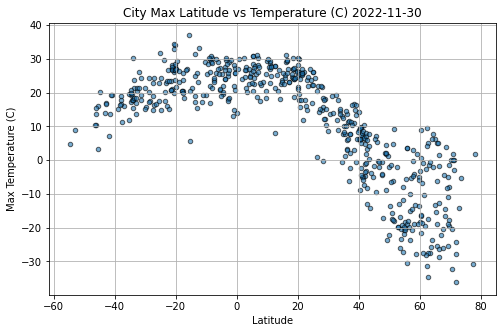

In [45]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
# scatterplot1df.plot(figsize=(10,8))
starttime=city_data_df['Date'][0]
Humantime=time.strftime('%Y-%m-%d',time.localtime(starttime))
scatterplot1df=city_data_df[['Lat','Max Temp']].rename(columns={'Lat':'Latitude','Max Temp':'Max Temperature (C)'})
scatterplot1df.plot(kind='scatter',x='Latitude',y='Max Temperature (C)',
                    title=f'City Max Latitude vs Temperature (C) {Humantime}',
                    edgecolor='black',alpha=0.6,linewidths=1,
                   figsize=(8,5))
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [63]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,25.57,82,92,1.17,LR,1669867467
1,khatanga,71.9667,102.5000,-27.96,97,100,4.28,RU,1669867467
2,hobart,-42.8794,147.3294,16.81,59,75,5.66,AU,1669867309
3,beidao,34.5686,105.8933,-0.44,25,99,0.32,CN,1669867468
4,narasannapeta,18.4167,84.0500,26.89,59,4,2.52,IN,1669867172
...,...,...,...,...,...,...,...,...,...
545,dublin,37.7021,-121.9358,10.42,76,0,2.57,US,1669867644
546,beaverlodge,55.2166,-119.4361,-20.73,95,100,2.47,CA,1669867644
547,khandyga,62.6667,135.6000,-34.58,92,100,0.69,RU,1669867645


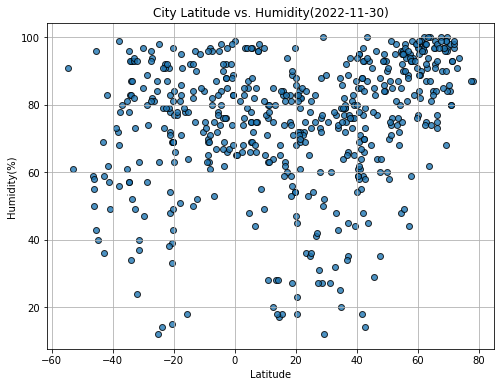

In [64]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x=city_data_df['Lat']
y=city_data_df['Humidity']
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y,edgecolors='black',alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Humidity({Humantime})')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

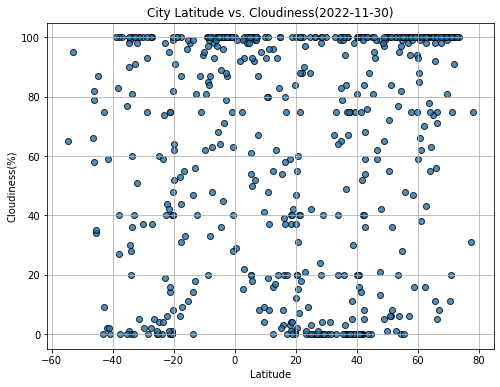

In [65]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y,edgecolors='black',alpha=0.8)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Cloudiness({Humantime})')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

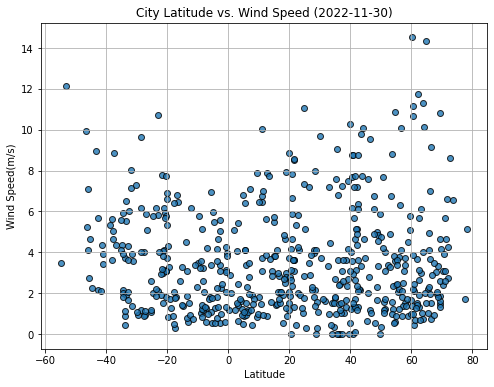

In [66]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.figure(figsize=(8,6))
plt.scatter(x=x,y=y,edgecolors='black',alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Wind Speed ({Humantime})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# x,y- input for scatter and regression; xlabel,ylabel-tag for the graph,xplot and yplot-locator for annotate
def linearRegressionHanndler(x,y,xlabel,ylabel,xplot,yplot):
    slope,intercept,r,p,stderr=linregress(x,y)
    regressionvalue=x*slope+intercept
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    equpline='y='+str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.plot(x,regressionvalue,color='r')
    plt.annotate(equpline,(xplot,yplot),fontsize=15,color='r')
    return print(f'The r-value is:{r}'),plt.show()
    

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,25.57,82,92,1.17,LR,1669867467
1,khatanga,71.9667,102.5000,-27.96,97,100,4.28,RU,1669867467
3,beidao,34.5686,105.8933,-0.44,25,99,0.32,CN,1669867468
4,narasannapeta,18.4167,84.0500,26.89,59,4,2.52,IN,1669867172
6,albany,42.6001,-73.9662,3.23,73,59,1.34,US,1669867183


In [69]:
len(northern_hemi_df)

373

In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hobart,-42.8794,147.3294,16.81,59,75,5.66,AU,1669867309
5,cape town,-33.9258,18.4232,17.97,87,100,0.89,ZA,1669867393
8,rikitea,-23.1203,-134.9692,22.79,73,74,5.84,PF,1669867469
10,mataura,-46.1927,168.8643,10.27,55,82,4.12,NZ,1669867303
12,bredasdorp,-34.5322,20.0403,17.25,78,90,2.16,ZA,1669867470


In [71]:
len(southern_hemi_df)

177

###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8581705986157355


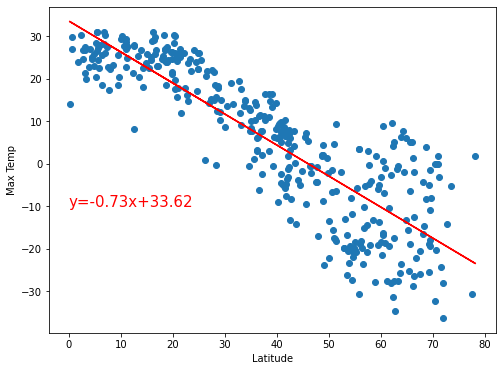

(None, None)

In [72]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=northern_hemi_df['Lat'],y=northern_hemi_df['Max Temp'],xlabel='Latitude',ylabel='Max Temp',
                        xplot=0,yplot=-10)

The r-value is:0.5466519498333073


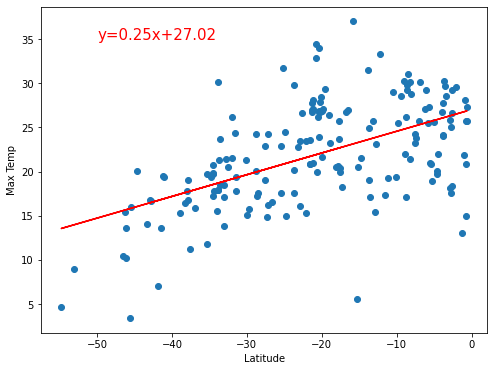

(None, None)

In [73]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE # note if put (35,-50) for annotate, it will plot outside of graph...
linearRegressionHanndler(x=southern_hemi_df['Lat'],y=southern_hemi_df['Max Temp'],xlabel='Latitude',ylabel='Max Temp',
                        xplot=-50,yplot=35)

**Discussion about the linear relationship:** \
Note: For this sample specific:\
    1.For Northern Hemisphere latitute and maxtemp are negative correlated, r-value@-0.8581705986157355 indicate the negative strong correlation. \
    2.For Southern Hemisphere latitute and maxtemp are postive correlated, r-value@0.5466519498333073 indicate the postive moderate correlcation.\
    ---------------------------again correlation is not causation----------------------------------------------

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.37861870186287155


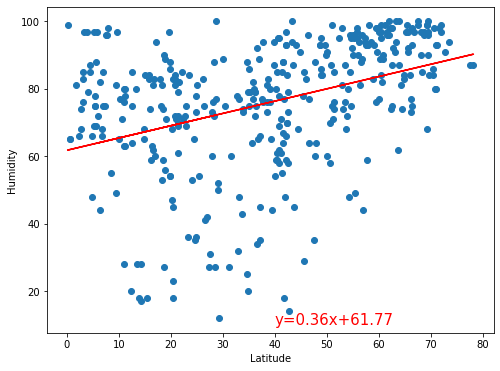

(None, None)

In [74]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=northern_hemi_df['Lat'],y=northern_hemi_df['Humidity'],xlabel='Latitude',ylabel='Humidity',
                        xplot=40,yplot=10)

The r-value is:0.22612113319805793


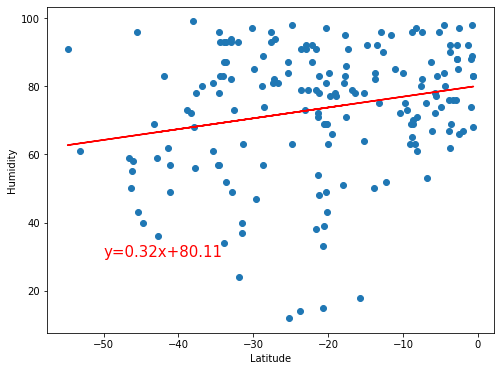

(None, None)

In [75]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=southern_hemi_df['Lat'],y=southern_hemi_df['Humidity'],xlabel='Latitude',ylabel='Humidity',
                        xplot=-50,yplot=30)

**Discussion about the linear relationship:** \
Note: For this sample specific:\
1.For Northern Hemisphere the correlation among Humidity & Latitude tend to show postive;\
r-value@0.37861870186287155; 0.3=<r<0.5 hence it is considered as weak\
2.For Southern Hemisphere the correlation among Humidity & Latitude tend to show postive;\
r-value@0.22612113319805793;r<0.3; hence it is considered to be None or weak

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.23936884939484435


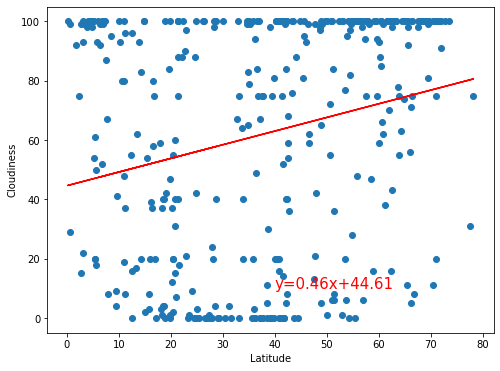

(None, None)

In [76]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=northern_hemi_df['Lat'],y=northern_hemi_df['Cloudiness'],xlabel='Latitude',ylabel='Cloudiness',
                        xplot=40,yplot=10)

The r-value is:0.28638870621071644


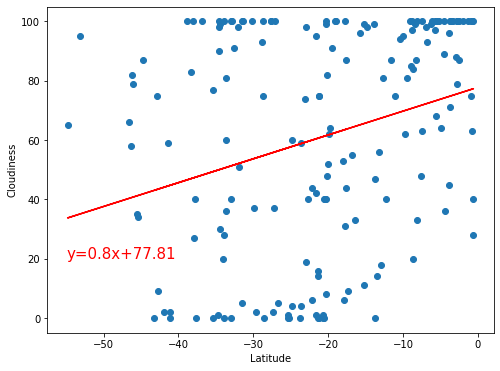

(None, None)

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=southern_hemi_df['Lat'],y=southern_hemi_df['Cloudiness'],xlabel='Latitude',ylabel='Cloudiness',
                        xplot=-55,yplot=20)

**Discussion about the linear relationship:**\
Note: For this sample specific:\
1.For Northern Hemisphere the correlation among Cloudiness & Latitude tend to show postive;\
r-value@0.23936884939484435<0.3 hence it is considered as none or very weak\
2.For Southern Hemisphere the correlation among Cloudiness & Latitude tend to show postive;\
r-value@0.28638870621071644<0.3 hence it is considered as none or very weak

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.08435893340776689


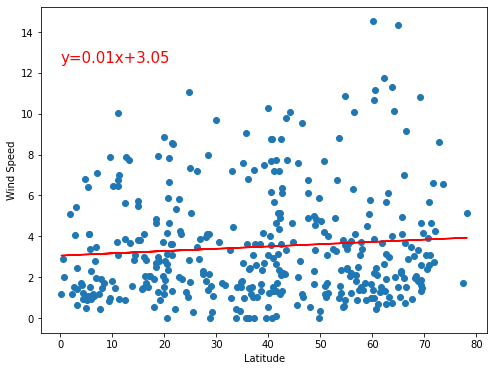

(None, None)

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=northern_hemi_df['Lat'],y=northern_hemi_df['Wind Speed'],xlabel='Latitude',ylabel='Wind Speed',
                        xplot=0,yplot=12.5)

The r-value is:-0.3388791620144056


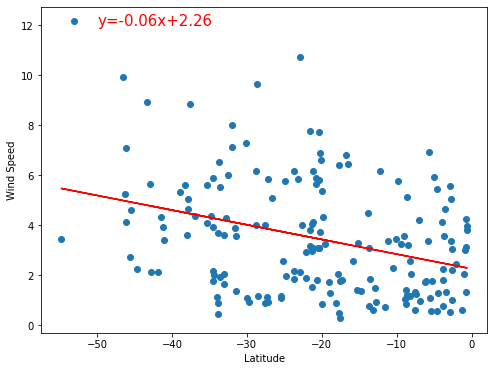

(None, None)

In [79]:
# Southern Hemisphere
# YOUR CODE HERE
linearRegressionHanndler(x=southern_hemi_df['Lat'],y=southern_hemi_df['Wind Speed'],xlabel='Latitude',ylabel='Wind Speed',
                        xplot=-50,yplot=12)

**Discussion about the linear relationship:** \
Note: For this sample specific:\
1.For Northern Hemisphere the correlation among Wind Speed & Latitude tend to show postive;\
r-value@ 0.08435893340776689<0.3 hence it is considered as none or very weak\
2.For Southern Hemisphere the correlation among Cloudiness & Latitude tend to show negative;\
r-value@|-0.3388791620144056|>0.3 hence it is considered as weak negative correlation